#PATH OF DATA: /content/TIME_SERIES_DATA.csv

In [ ]:
#importing libraries
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

**Loading the data**

In [ ]:
data=pd.read_csv('/content/TIME_SERIES_DATA.csv')

data.head()

,ENG_PROJ_CODE,ENG_PROJ_DESC,NOTIF_CREATION_DT,REPAIR_CNT
0,DXX,MY_PRODUCT,9/20/19,59
1,DXX,MY_PRODUCT,9/21/19,200
2,DXX,MY_PRODUCT,9/22/19,203
3,DXX,MY_PRODUCT,9/23/19,343
4,DXX,MY_PRODUCT,9/24/19,351


A Time Series is defined as a series of data points indexed in time order. The time order can be daily, monthly, or even yearly. 
Time act as an independent variable to estimate dependent variable.

Time Series Forecasting
Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

**Some Use Cases**

* To predict the number of incoming or churning customers.
* To explaining seasonal patterns in sales.
* To detect unusual events and estimate the magnitude of their effect.
* To Estimate the effect of a newly launched product on number of sold units.

**Components of a Time Series:**

**Trend:**The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

**Seasonality**:The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.

**Cyclical Component:** These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

**Irregular Variation:** These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.



ARIMA Model for Time Series Forecasting
ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q).

**AR(p) Autoregression** – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

**I(d) Integration **– uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

**MA(q) Moving Average** – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

**Types of ARIMA Model**

* ARIMA:Non-seasonal Autoregressive Integrated Moving Averages
* SARIMA:Seasonal ARIMA
* SARIMAX:Seasonal ARIMA with exogenous variables

**ARIMA and Seasonal ARIMA**

**Autoregressive Integrated Moving Averages**

The general process for ARIMA models is the following:

* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


**White Noise:**

White noise is an important concept in time series forecasting.

If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

Source: https://machinelearningmastery.com/white-noise-time-series-python/

**What is a White Noise Time Series?**

A time series may be white noise.

A time series is white noise if the variables are independent and identically distributed with a mean of zero.

This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.

If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

**Why Does it Matter?**

White noise is an important concept in time series analysis and forecasting.

It is important for two main reasons:

Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise.


**Is your Time Series White Noise?**

Your time series is probably NOT white noise if one or more of the following conditions are true:

* Is the mean/level non-zero?
* Does the mean/level change over time?
* Does the variance change over time?
* Do values correlate with lag values?

Some tools that you can use to check if your time series is white noise are:

* Create a line plot. Check for gross features like a changing mean, variance, or obvious relationship between lagged variables.

* Calculate summary statistics. Check the mean and variance of the whole series against the mean and variance of meaningful contiguous blocks of values in the series (e.g. days, months, or years).

* Create an autocorrelation plot. Check for gross correlation between lagged variables.



**Data Preprocessing**
This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [ ]:
repair_data=data[['NOTIF_CREATION_DT','REPAIR_CNT']]

repair_data.head(2)

,NOTIF_CREATION_DT,REPAIR_CNT
0,9/20/19,59
1,9/21/19,200


In [ ]:
#convert date column to pandas date time colums 

repair_data['NOTIF_CREATION_DT']=pd.to_datetime(repair_data['NOTIF_CREATION_DT'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
repair_data.isnull().sum()

NOTIF_CREATION_DT    0
REPAIR_CNT           0
dtype: int64

** Step 1: Indexing with Time Series Data**

In [ ]:
repair_data = repair_data.set_index('NOTIF_CREATION_DT')
repair_data.index

DatetimeIndex(['2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23',
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-28', '2019-09-29',
               ...
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26'],
              dtype='datetime64[ns]', name='NOTIF_CREATION_DT', length=311, freq=None)

In [ ]:
repair_data.head()

,REPAIR_CNT
NOTIF_CREATION_DT,
2019-09-20,59
2019-09-21,200
2019-09-22,203
2019-09-23,343
2019-09-24,351


In [ ]:
repair_data.describe()

,REPAIR_CNT
count,311.000000
mean,2170.083601
std,1080.075977
min,59.000000
25%,1460.500000
50%,2031.000000
75%,2699.500000
max,5283.000000


**Step 2: Visualize the Data**

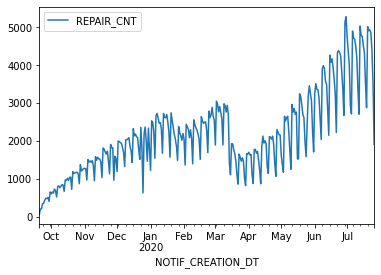

In [ ]:
repair_data.plot()

**We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.**

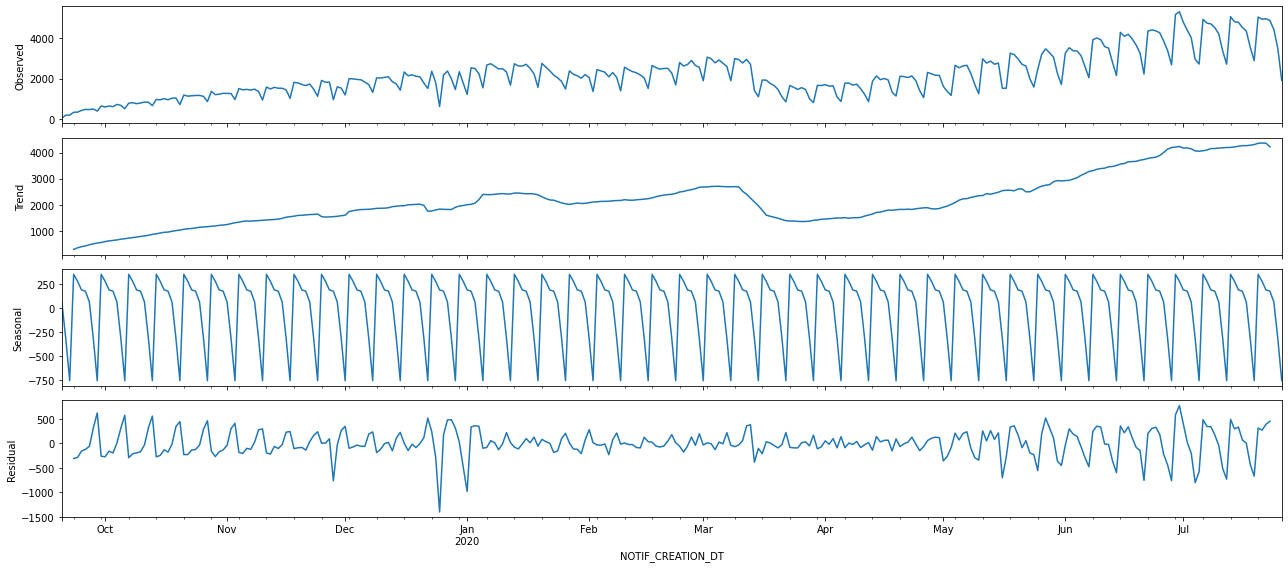

In [ ]:
import statsmodels.api as sm
y = repair_data['REPAIR_CNT']
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the number of repair counts is unstable, along with its obvious seasonality.

### Step 3: Testing For Stationarity


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(repair_data['REPAIR_CNT'])

In [ ]:
test_result

(-1.016191749157101,
 0.7473130182464434,
 14,
 296,
 {'1%': -3.452636878592149,
  '10%': -2.5719993576515705,
  '5%': -2.8713543954331433},
 4093.6827793671314)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(INPUT_MEASURE):
    result=adfuller(INPUT_MEASURE)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(repair_data['REPAIR_CNT'])

ADF Test Statistic : -1.016191749157101
p-value : 0.7473130182464434
#Lags Used : 14
Number of Observations Used : 296
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#Observation:

#as the p-value : 0.7473130182464434, we can easily says that "it is non-stationary"

**Making the data stationary**

**Approach used is Differencing**

In [ ]:
repair_data['REPAIR_CNT First Difference'] = repair_data['REPAIR_CNT'] - repair_data['REPAIR_CNT'].shift(1)

In [ ]:
repair_data['REPAIR_CNT']

NOTIF_CREATION_DT
2019-09-20      59
2019-09-21     200
2019-09-22     203
2019-09-23     343
2019-09-24     351
              ... 
2020-07-22    4937
2020-07-23    4851
2020-07-24    4408
2020-07-25    3492
2020-07-26    1914
Name: REPAIR_CNT, Length: 311, dtype: int64

In [ ]:
repair_data['REPAIR_CNT'].shift(1)

NOTIF_CREATION_DT
2019-09-20       NaN
2019-09-21      59.0
2019-09-22     200.0
2019-09-23     203.0
2019-09-24     343.0
               ...  
2020-07-22    4915.0
2020-07-23    4937.0
2020-07-24    4851.0
2020-07-25    4408.0
2020-07-26    3492.0
Name: REPAIR_CNT, Length: 311, dtype: float64

In [ ]:
repair_data

,REPAIR_CNT,REPAIR_CNT First Difference
NOTIF_CREATION_DT,,
2019-09-20,59,NaN
2019-09-21,200,141.0
2019-09-22,203,3.0
2019-09-23,343,140.0
2019-09-24,351,8.0
...,...,...
2020-07-22,4937,22.0
2020-07-23,4851,-86.0
2020-07-24,4408,-443.0


In [ ]:
repair_data['seasonal First Difference']=repair_data['REPAIR_CNT']-repair_data['REPAIR_CNT'].shift(12)


In [ ]:
repair_data

,REPAIR_CNT,REPAIR_CNT First Difference,seasonal First Difference
NOTIF_CREATION_DT,,,
2019-09-20,59,NaN,NaN
2019-09-21,200,141.0,NaN
2019-09-22,203,3.0,NaN
2019-09-23,343,140.0,NaN
2019-09-24,351,8.0,NaN
...,...,...,...
2020-07-22,4937,22.0,743.0
2020-07-23,4851,-86.0,1496.0
2020-07-24,4408,-443.0,1702.0


In [ ]:
## Again test dickey fuller test
adfuller_test(repair_data['seasonal First Difference'].dropna())

ADF Test Statistic : -3.4731913891254758
p-value : 0.008702887874093661
#Lags Used : 14
Number of Observations Used : 284
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


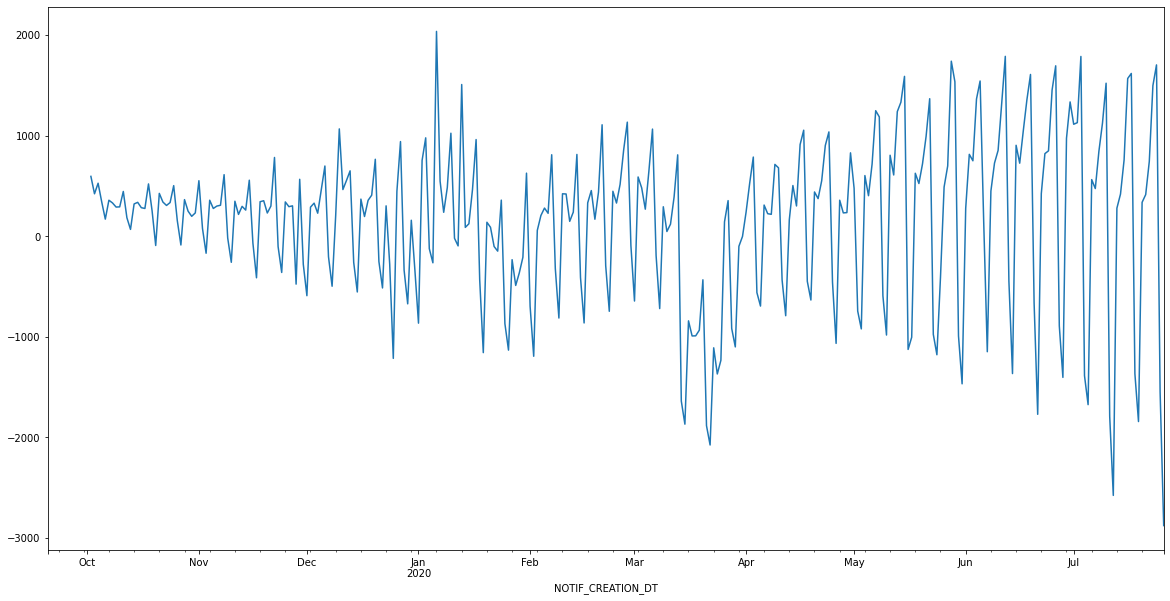

In [ ]:
plt.figure(figsize=(20,10))
repair_data['seasonal First Difference'].plot()


#from matplotlib import pyplot as plt
#plt.figure(figsize=(1,1))
#x = [1,2,3]
#plt.plot(x, x)
#plt.show()

**Auto Regressive Model**

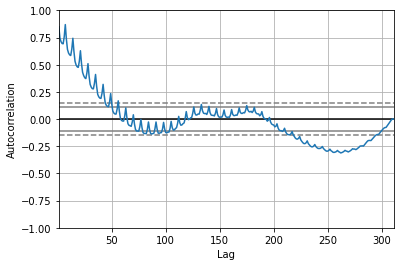

In [ ]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(repair_data['REPAIR_CNT'])
plt.show()

Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.  

* For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

* Identification of an MA model is often best done with the ACF rather than the PACF.

* For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

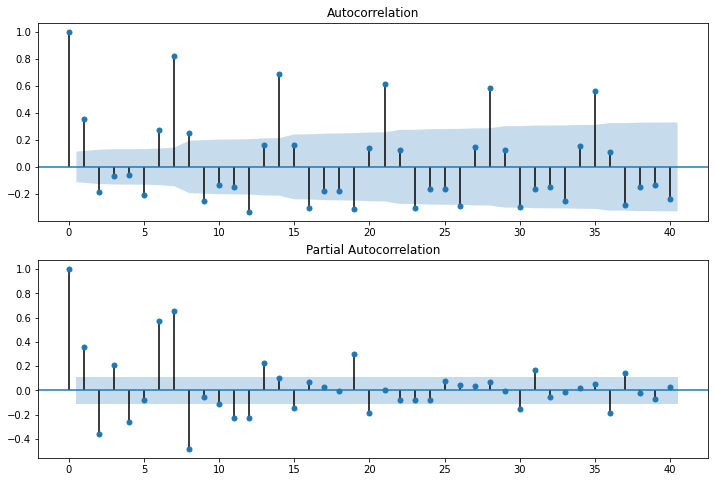

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(repair_data['seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(repair_data['seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(repair_data['REPAIR_CNT'],order=(1,1,1))
model_fit=model.fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.REPAIR_CNT   No. Observations:                  310
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2371.945
Method:                       css-mle   S.D. of innovations            508.252
Date:                Mon, 27 Jul 2020   AIC                           4751.890
Time:                        03:14:58   BIC                           4766.837
Sample:                    09-21-2019   HQIC                          4757.865
                         - 07-26-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.6671      5.079      2.297      0.022       1.712      21.622
ar.L1.D.REPAIR_CNT     0.3517      0.064      5.508      0.000       0.227       0.477
ma.L1.D.REPAIR_CNT    -0.8888      0.025    -35.085      0.000      -0.938      -0.839
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8434           +0.0000j            2.8434            0.0000
MA.1            1.1252           +0.0000j            1.1252            0.0000
-----------------------------------------------------------------------------
"""

**Time series forecasting with ARIMA**

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False
                                            )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5714.314120237039
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5225.094327543073
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4853.68967567376
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4630.855967475285
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4871.469822671692
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4798.7442090715285
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4656.228474722275
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4632.7592167549265
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5475.420806030379
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4933.890790432037
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4738.039385215483
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4512.719388152609
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4766.148951804239
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4685.2612520772545
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4554.770853434687
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4513.021045140902
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4813.172221464783
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4619.072149065298
ARIMA(0,

The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 4395.409. Therefore we should consider this to be optimal option.


**Fitting the ARIMA model**

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3313      0.071      4.641      0.000       0.191       0.471
ma.L1         -1.1572      0.072    -16.136      0.000      -1.298      -1.017
ar.S.L12      -0.2276      0.082     -2.792      0.005      -0.387      -0.068
ma.S.L12      -1.0001      0.146     -6.870      0.000      -1.285      -0.715
sigma2      1.999e+05   7.28e-07   2.74e+11      0.000       2e+05       2e+05


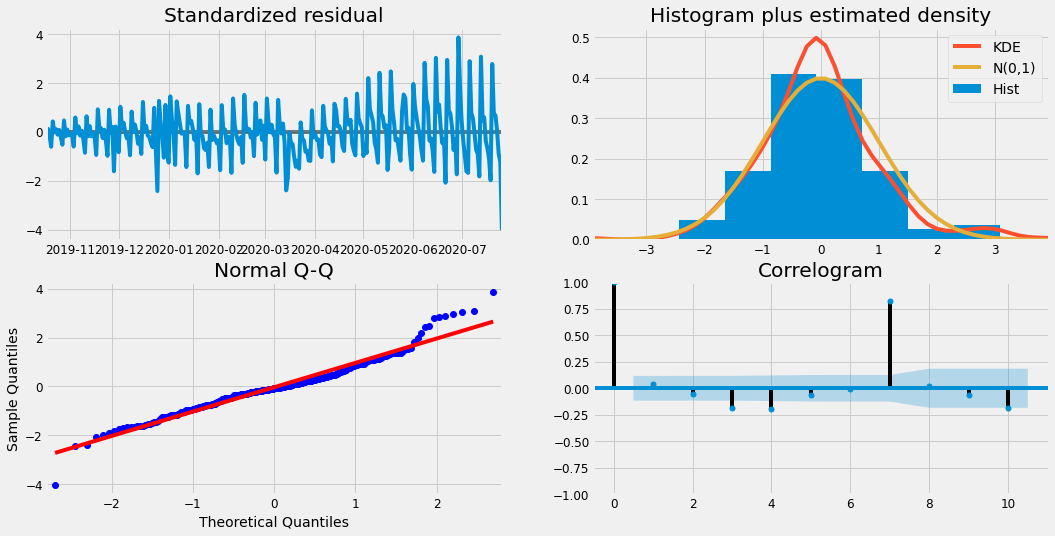

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**Validating forecasts**

To help us understand the accuracy of our forecasts, we compare predicted REPAIR_COUNTS to real REPAIR_COUNTS of the time series, and we set forecasts to start at 2020–07–01 to the end of the data.

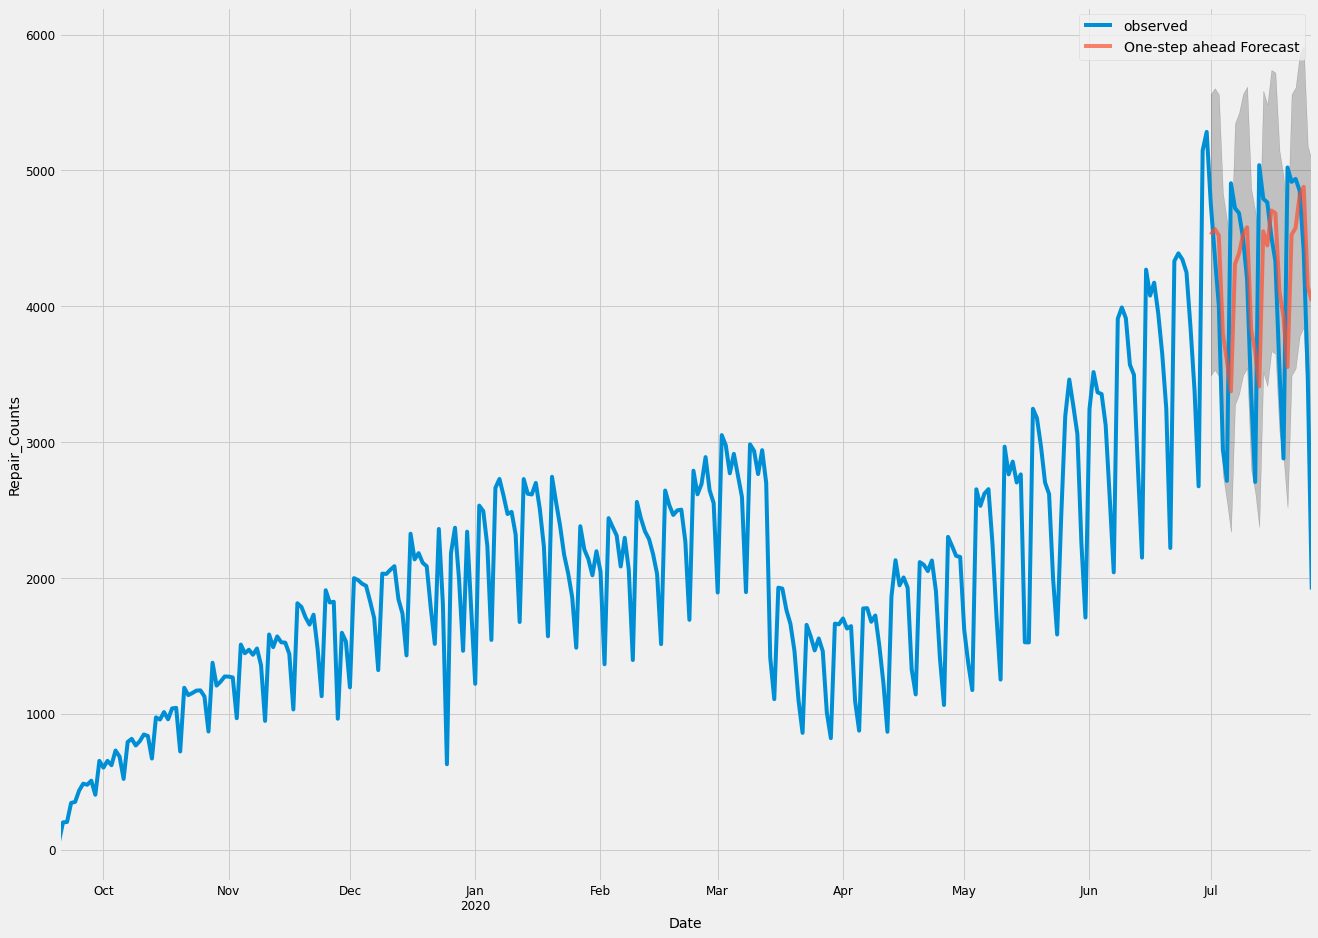

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 15))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Repair_Counts')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-07-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
 
#The Mean Squared Error of our forecasts is 682984.29

The Mean Squared Error of our forecasts is 682984.29


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 826.43


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily repair counts in the test set within 826.43 of the real repair counts.

**Producing and visualizing forecasts**

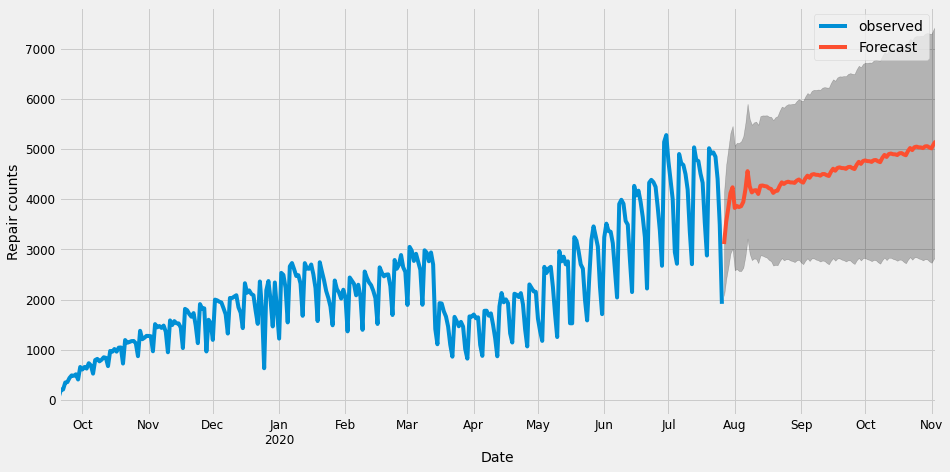

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Repair counts')
plt.legend()
plt.show()

**Time Series Modeling with Prophet**

Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. 

In [ ]:
repair_data.head(2)

,REPAIR_CNT
NOTIF_CREATION_DT,
2019-09-20,59
2019-09-21,200


In [ ]:
repair_data=data[['NOTIF_CREATION_DT','REPAIR_CNT']]

repair_data.head(2)

repair_data.columns=["ds","y"]

In [ ]:
repair_data.head(2)

,ds,y
0,9/20/19,59
1,9/21/19,200


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

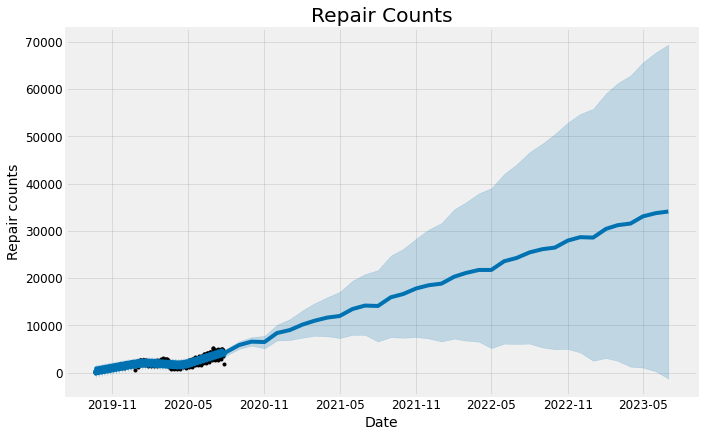

In [ ]:
from fbprophet import Prophet
repair_data = repair_data.rename(columns={'Repair Date': 'ds', 'Repair counts': 'y'})
repair_data_model = Prophet(interval_width=0.95)
repair_data_model.fit(repair_data)
repair_data_forecast = repair_data_model.make_future_dataframe(periods=36, freq='MS')
repair_data_forecast = repair_data_model.predict(repair_data_forecast)
plt.figure(figsize=(18, 6))
repair_data_model.plot(repair_data_forecast, xlabel = 'Date', ylabel = 'Repair counts')
plt.title('Repair Counts');